In [1]:
import numpy as np
import pandas as pd
import time
import graphviz
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

k = 64

census_data = pd.read_csv('ano-data/titanic/'+str(k)+'_titanic.csv',header = 0,sep=',',engine='python',na_values='?')
census_test = pd.read_csv('ano-data/titanic/'+str(1)+'_titanic_test.csv',header = 0,sep=',',engine='python',na_values='?')

census_data.drop(census_data.columns[0], axis=1,inplace = True)
census_test.drop(census_test.columns[0], axis=1,inplace = True)

data_feature = census_data.drop(columns=['Survived']).copy()
data_label = census_data['Survived'].copy()

test_feature = census_test.drop(columns=['Survived']).copy()
test_label = census_test['Survived'].copy()

def Accuracy(predicted, truth):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i]==truth.iloc[i]:
            correct +=1
    return correct/len(predicted)

print("Minimum expected accuracy: "+str(data_label.value_counts().max()/data_label.value_counts().sum()*100))
print("Minimum expected accuracy: "+str(test_label.value_counts().max()/test_label.value_counts().sum()*100))

Minimum expected accuracy: 59.55056179775281
Minimum expected accuracy: 61.631419939577036


In [2]:
#Converting labels to 0-1
for i in range(data_label.shape[0]):
    data_label.iloc[i]=int("1" in str(data_label.iloc[i]))
for i in range(test_label.shape[0]):
    test_label.iloc[i]=int("1" in str(test_label.iloc[i]))

In [3]:
#KNN

K = [1,3,5,10,20,100]
traintimes = np.zeros(len(K))
evaltimes = np.zeros(len(K))
accuracies = np.zeros(len(K))

from sklearn.neighbors import KNeighborsClassifier
for i in range(len(K)):
    start = time.time()
    neigh = KNeighborsClassifier(n_neighbors=K[i])
    neigh.fit(data_feature, data_label)
    traintimes[i] = time.time()-start
    start = time.time()
    prediction = neigh.predict(test_feature)
    evaltimes[i]=time.time()-start
    accuracies[i] = Accuracy(prediction,test_label)

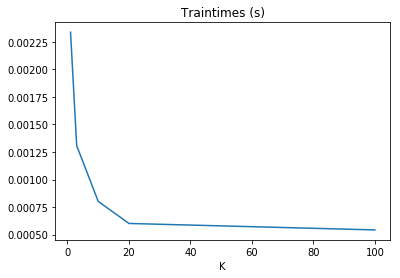

In [4]:
plt.figure()
plt.plot(K,traintimes)
plt.xlabel('K')
plt.title('Traintimes (s)')
plt.savefig("CensusIncome_traintime_noscale.png")

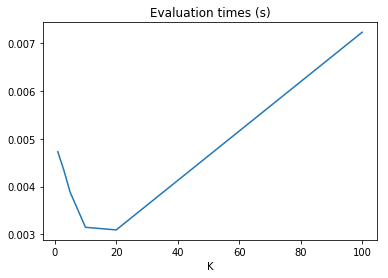

In [5]:
plt.figure()
plt.plot(K,evaltimes)
plt.xlabel('K')
plt.title('Evaluation times (s)')
plt.savefig("CensusIncome_evaltime_noscale.png")

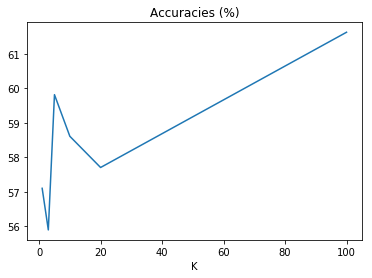

In [6]:
plt.figure()
plt.plot(K,accuracies*100)
plt.xlabel('K')
plt.title('Accuracies (%)')
plt.savefig("CensusIncome_Acc_noscale.png")

In [7]:
#This is probably very important for kNN
#There is a huge conceptual error with this step, since the different one-hot encoded parts of the same category will be treated differently, we should correct it, if we have time
#Right now this reduces the accuracy, but with proper handling i'm sure it can increase too.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_feature = sc.fit_transform(data_feature)
test_feature = sc.transform(test_feature)

In [8]:
pd.DataFrame(data_feature).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,...,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,712.0,712.0,712.0
mean,4.185167e-16,-1.023682e-16,3.293246e-16,5.270441e-16,1.593607e-16,1.159185e-15,-1.159185e-15,1.167917e-15,1.167917e-15,-1.237150e-15,...,9.031477e-16,9.031477e-16,9.031477e-16,1.942890e-15,2.966416e-15,1.942890e-15,2.669993e-15,-1.0,-1.0,-1.0
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,...,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,0.0,0.0,0.0
min,-1.287309e+00,-6.534272e-01,-9.971949e-01,-5.903261e-01,-5.665375e-01,-1.322511e+00,-7.561375e-01,-1.317882e+00,-1.317882e+00,-9.766702e-01,...,-1.533046e+00,-1.533046e+00,-1.533046e+00,-7.179227e-01,-9.602866e-01,-7.179227e-01,-4.770600e-01,-1.0,-1.0,-1.0
25%,-1.045018e+00,-5.012575e-01,-9.971949e-01,-5.903261e-01,-5.665375e-01,-1.322511e+00,-7.561375e-01,-1.317882e+00,-1.317882e+00,-9.766702e-01,...,-7.091989e-01,-7.091989e-01,-7.091989e-01,-7.179227e-01,-9.602866e-01,-7.179227e-01,-4.770600e-01,-1.0,-1.0,-1.0
50%,2.638500e-01,-3.576726e-01,-9.971949e-01,-5.903261e-01,-5.665375e-01,7.561375e-01,-7.561375e-01,-1.900791e-01,-1.900791e-01,6.480709e-01,...,1.166731e-02,1.166731e-02,1.166731e-02,-7.179227e-01,3.188978e-01,-7.179227e-01,-4.770600e-01,-1.0,-1.0,-1.0
75%,7.121968e-01,-2.962586e-02,1.002813e+00,1.693979e+00,-5.665375e-01,7.561375e-01,1.322511e+00,9.377236e-01,9.377236e-01,6.480709e-01,...,1.213111e+00,1.213111e+00,1.213111e+00,1.010140e+00,1.278286e+00,1.010140e+00,-4.770600e-01,-1.0,-1.0,-1.0
max,1.624104e+00,9.031168e+00,1.002813e+00,1.693979e+00,1.765108e+00,7.561375e-01,1.322511e+00,9.377236e-01,9.377236e-01,1.460441e+00,...,1.213111e+00,1.213111e+00,1.213111e+00,1.701365e+00,1.278286e+00,1.701365e+00,2.096173e+00,-1.0,-1.0,-1.0


In [9]:
#KNN

K = [1,3,5,10,20,100]
traintimes_scal = np.zeros(len(K))
evaltimes_scal = np.zeros(len(K))
accuracies_scal = np.zeros(len(K))

from sklearn.neighbors import KNeighborsClassifier
for i in range(len(K)):
    start = time.time()
    neigh = KNeighborsClassifier(n_neighbors=K[i])
    neigh.fit(data_feature, data_label)
    traintimes_scal[i] = time.time()-start
    start = time.time()
    prediction = neigh.predict(test_feature)
    evaltimes_scal[i]=time.time()-start
    accuracies_scal[i] = Accuracy(prediction,test_label)

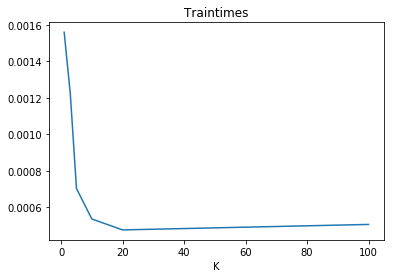

In [10]:
plt.figure()
plt.plot(K,traintimes_scal)
plt.xlabel('K')
plt.title('Traintimes')
plt.savefig("CensusIncome_traintime_scale.png")

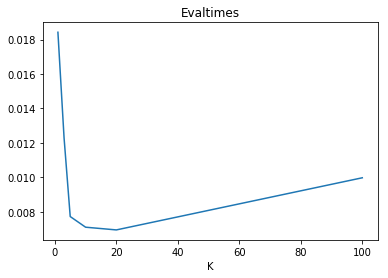

In [11]:
plt.figure()
plt.plot(K,evaltimes_scal)
plt.xlabel('K')
plt.title('Evaltimes')
plt.savefig("CensusIncome_eval_scale.png")

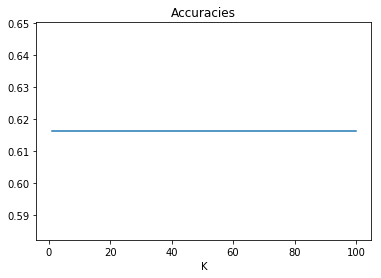

In [12]:
plt.figure()
plt.plot(K,accuracies_scal)
plt.xlabel('K')
plt.title('Accuracies')
plt.savefig("CensusIncome_Acc_scale.png")

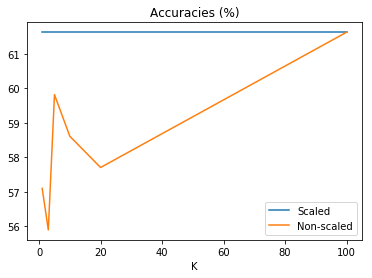

In [13]:
plt.figure()
plt.plot(K,accuracies_scal*100,label = "Scaled")
plt.plot(K,accuracies*100,label= "Non-scaled")
plt.xlabel("K")
plt.title("Accuracies (%)")
plt.legend()
plt.savefig("CensusIncome_Acc_kNN.png")

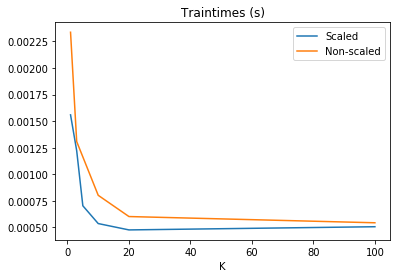

In [14]:
plt.figure()
plt.plot(K,traintimes_scal,label = "Scaled")
plt.plot(K,traintimes,label= "Non-scaled")
plt.xlabel("K")
plt.title("Traintimes (s)")
plt.legend()
plt.savefig("CensusIncome_Train_kNN.png")

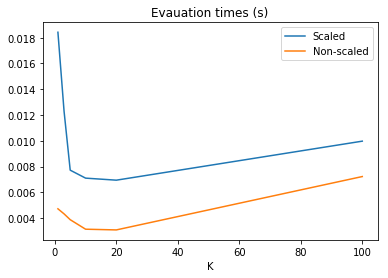

In [15]:
plt.figure()
plt.plot(K,evaltimes_scal,label = "Scaled")
plt.plot(K,evaltimes,label= "Non-scaled")
plt.xlabel("K")
plt.title("Evauation times (s)")
plt.legend()
plt.savefig("CensusIncome_Eval_kNN.png")